# Estimativa de consumo de combustível em sistema de aquecimento de água por semi-batelada

### Considerações iniciais

#### Fluxograma de trabalho do equipamento

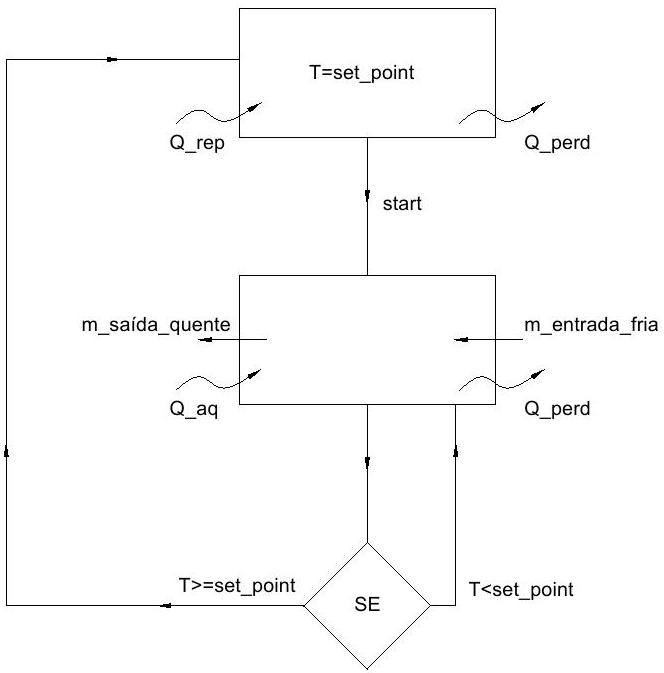

In [1]:
from IPython.display import Image
Image("/home/rburcon/Modelos/trocador_calor/fluxograma.jpg")

In [2]:
from iapws import IAPWS97
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(rc={"figure.figsize": (12, 6)})

#### Dados do sistema

In [3]:
T_ini=25 #C
T_final=75 #C
PCI_glp=46128.6 #kJ/kg
PCI_lenha_umid=10041.6 #kJ/kg com 40% de umidade
PCI_lenha_seca=15899.2 #kJ/kg com 12% de umidade
efic_caldeira=0.75 #varia entre 65% a 75%, podendo chegar até 87%
m=10000 #massa de água aquecida por hora

#### Propriedades físicas da água

In [4]:
T_ini=T_ini+273.15 #K
T_final=T_final+273.15 #K
agua_sat_inic=IAPWS97(T=T_ini, x=0) 
agua_sat_final=IAPWS97(T=T_final, x=0) 

In [5]:
Q=m*((agua_sat_inic.cp+agua_sat_final.cp)/2)*(T_final-T_ini)
m_gas=(Q/PCI_glp)/efic_caldeira
m_lenha_umid=(Q/PCI_lenha_umid)/efic_caldeira
m_lenha_seca=(Q/PCI_lenha_seca)/efic_caldeira

In [6]:
       
print ("\nO calor consumido por hora-->>", round(Q,2), "kJ ou", round(Q*0.239006,2),"kcal" )
print ("\nA massa de combustivel consumida por hora-->>", round(m_gas,2), "kg de GLP")
print ("\nA massa de combustivel consumida por hora-->>", round(m_lenha_umid,2), "kg de lenha 40% umidade")
print ("\nA massa de combustivel consumida por hora-->>", round(m_lenha_seca,2), "kg de lenha 12% umidade\n\n")



O calor consumido por hora-->> 2093465.59 kJ ou 500350.84 kcal

A massa de combustivel consumida por hora-->> 60.51 kg de GLP

A massa de combustivel consumida por hora-->> 277.97 kg de lenha 40% umidade

A massa de combustivel consumida por hora-->> 175.56 kg de lenha 12% umidade




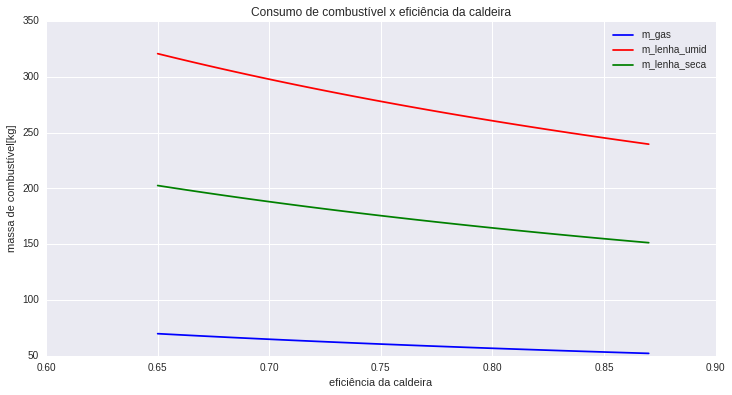

In [7]:
efic_caldeira=x=np.linspace(0.65,0.87,100)

m_gas=(Q/PCI_glp)/efic_caldeira
m_lenha_umid=(Q/PCI_lenha_umid)/efic_caldeira
m_lenha_seca=(Q/PCI_lenha_seca)/efic_caldeira

fig, ax = plt.subplots()
ax.plot(efic_caldeira, m_gas, color="blue", label="m_gas")
ax.plot(efic_caldeira, m_lenha_umid, color="red", label="m_lenha_umid")
ax.plot(efic_caldeira, m_lenha_seca, color="green", label="m_lenha_seca")
ax.set_title("Consumo de combustível x eficiência da caldeira")
ax.set_xlabel("eficiência da caldeira")
ax.set_ylabel("massa de combustível[kg]")
ax.legend()
plt.show()